<a href="https://colab.research.google.com/github/jackaquamin/myprojects/blob/main/TestCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load the saved trained model
from tensorflow.keras.models import load_model
cnn = load_model('/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/covid.h5')
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 128)      0

In [ ]:
# upload the image
from google.colab import files
file = files.upload()

Saving 0102.jpeg to 0102.jpeg


In [ ]:
# visualize the image
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('0102.jpeg', target_size=(512, 512))
img_tensor = image.img_to_array(img)

# prepare to input into network so we have batch size (1,150,150,3)
print (img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print (img_tensor.shape)
img_tensor /= 255

(512, 512, 3)
(1, 512, 512, 3)


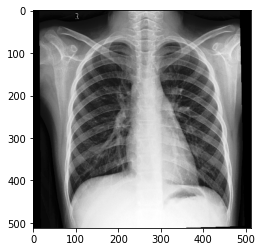

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
out = cnn.predict(img_tensor)
print(out)

[[3.9723952e-04 9.9880350e-01 7.9923589e-04]]


In [ ]:
# prediction out to class
pred_scores= cnn.predict(img_tensor)
if pred_scores[0][0] > pred_scores[0][1] and pred_scores[0][0] > pred_scores[0][2]:
  pred_class = "Covid"
elif pred_scores[0][1] > pred_scores[0][0] and pred_scores[0][1] > pred_scores[0][2]:
  pred_class = "Normal"
else:
  pred_class ="Viral Pneumonia"
print("Prediction class: ", pred_class)

Prediction class:  Normal
